In [1]:
%matplotlib inline
import numpy as np
import poppy
import matplotlib.pyplot as plt
import astropy.units as u
from llowfs import generate_wfe_array, simulate_multiple_llowfs
import h5py

## Generating Data

In [3]:
highest_coeff = 15
zernike_bound = 50e-9

nSteps = 20
coeff_array = np.linspace(-1*zernike_bound,zernike_bound,num=nSteps)
print(coeff_array.shape)

N = nSteps * (highest_coeff-1)

wfe_array = np.zeros((highest_coeff-1,N))

for i in range(highest_coeff-1):
    startInd = i*nSteps
    wfe_array[i,startInd:startInd+nSteps] = coeff_array


print(wfe_array.shape)
print(wfe_array[:,18:22])

(20,)
(14, 280)
[[ 4.47368421e-08  5.00000000e-08  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-08 -4.47368421e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [ ]:
file_out = 'vortex_50nm_15_individual_zernikes.hdf5'
#size of output images is 64*oversample square, so oversample=2 gives 128x128 arrays
#oversample=2 works well and doesn't take too long
#'coronagraph' can be 'vortex' or 'fqpm'. See 'Test Responses' notebook for more info.
simulate_multiple_llowfs(wfe_array,file_out,oversample=2,wavelength=632e-9*u.m,coronagraph='vortex')

## Reading Data

In [ ]:
with h5py.File(file_out, 'r') as hf:
    coeffs = np.array(hf.get('zernike_coeffs'))
    images = np.array(hf.get('images'))
print(coeffs.shape)
print(coeffs[:,:3])
print(images.shape)

In [ ]:
for i in range(5):
    plt.figure()
    plt.imshow(10*np.log10(images[:,:,i]),cmap='gray')
    plt.colorbar()

In [12]:
with h5py.File("resnet_18_100_tanh_MAE_linear_epoch_100_1e7.h5", 'r') as hf:
    data = hf['1'].value

In [14]:
data.shape

(500, 14)

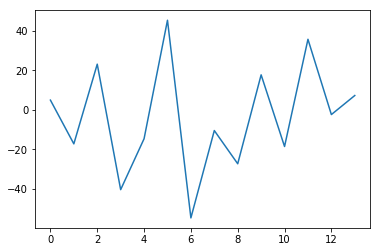

In [16]:
plt.plot(data[0,:]*100)